In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from DataCleaning import CleanDataFrame
from featureVisualization import FeatureVisualization
from inferentialStatistics import InferStats
from dataProcess import FeatureEngineering, DataPreparation
from modelEvaluation import ModelEvaluation

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Step 1: Cleaning Dataset.

In [2]:
# Create an instance of the CleanDataFrame Class
df_cleaner = CleanDataFrame()


The clean_data method does the following:
- Checks for duplicates and missing values.
- Also splits the dataset into to subset. The train_df and test_df. We split the dataset because the test_df has missing values in the target variable, which we want to predict.
- Finally, the method change the data type of some columns.

In [3]:
# Call the clean_data fro df_cleaner.
train_df, test_df = df_cleaner.clean_data()

train_df

We have duplicate values.

We have missing values.
We need to handle this


,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,
2,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
5,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR
6,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Layup,34.0443,0,0,-118.2698,7,4,1,1999-00,4,0,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,LAL vs. IND,IND
30693,Jump Shot,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,LAL vs. IND,IND
30695,Jump Shot,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,LAL vs. IND,IND


# Step 2: Explanatory Data Analysis (E.D.A.)

In [4]:
viz = FeatureVisualization(train_df)

The FeatureVisualizationg class has 6 methods, which does the following:
- court_visualization: returns the basketball and where Kobe made or not a shot.
- count_target_feature: Plots in histograms how many shots Kobe made or not.
- num_plotter: Returns the distribution in a boxplot of the numerical features and compared it if the shot made or not.
- distribution_visualization: returns the distribution of the numerical features.
- cat_plotter: Visualize how many unique values we have per category.
- shot_percentage: Visualize the percentage of shot based on the unique values on different features.

### Let's Visualize the made or not made shot in the court.

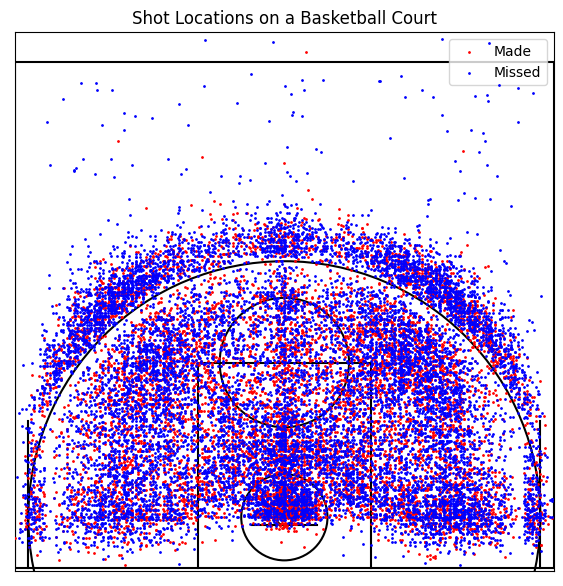

In [5]:
viz.court_visualization()

### Count target features. 

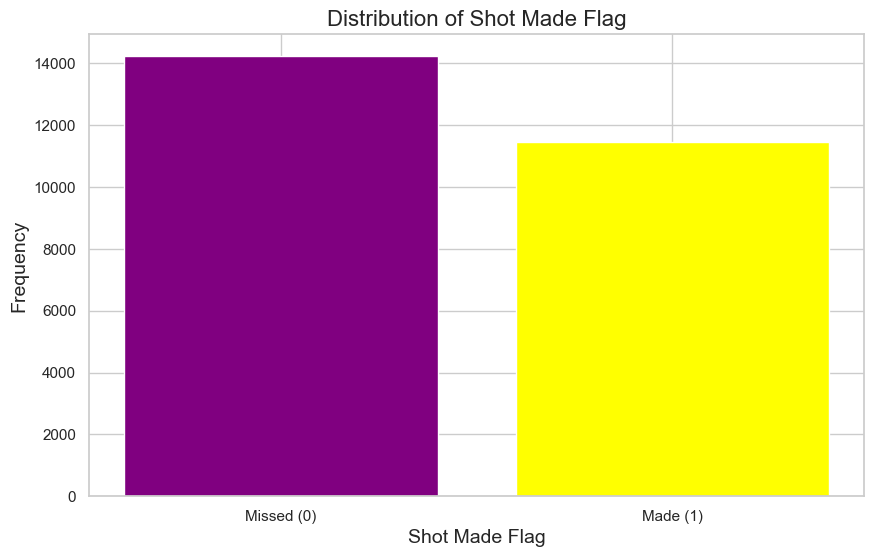

In [6]:
viz.count_target_feature()

### Boxplot distribution of numerical features.


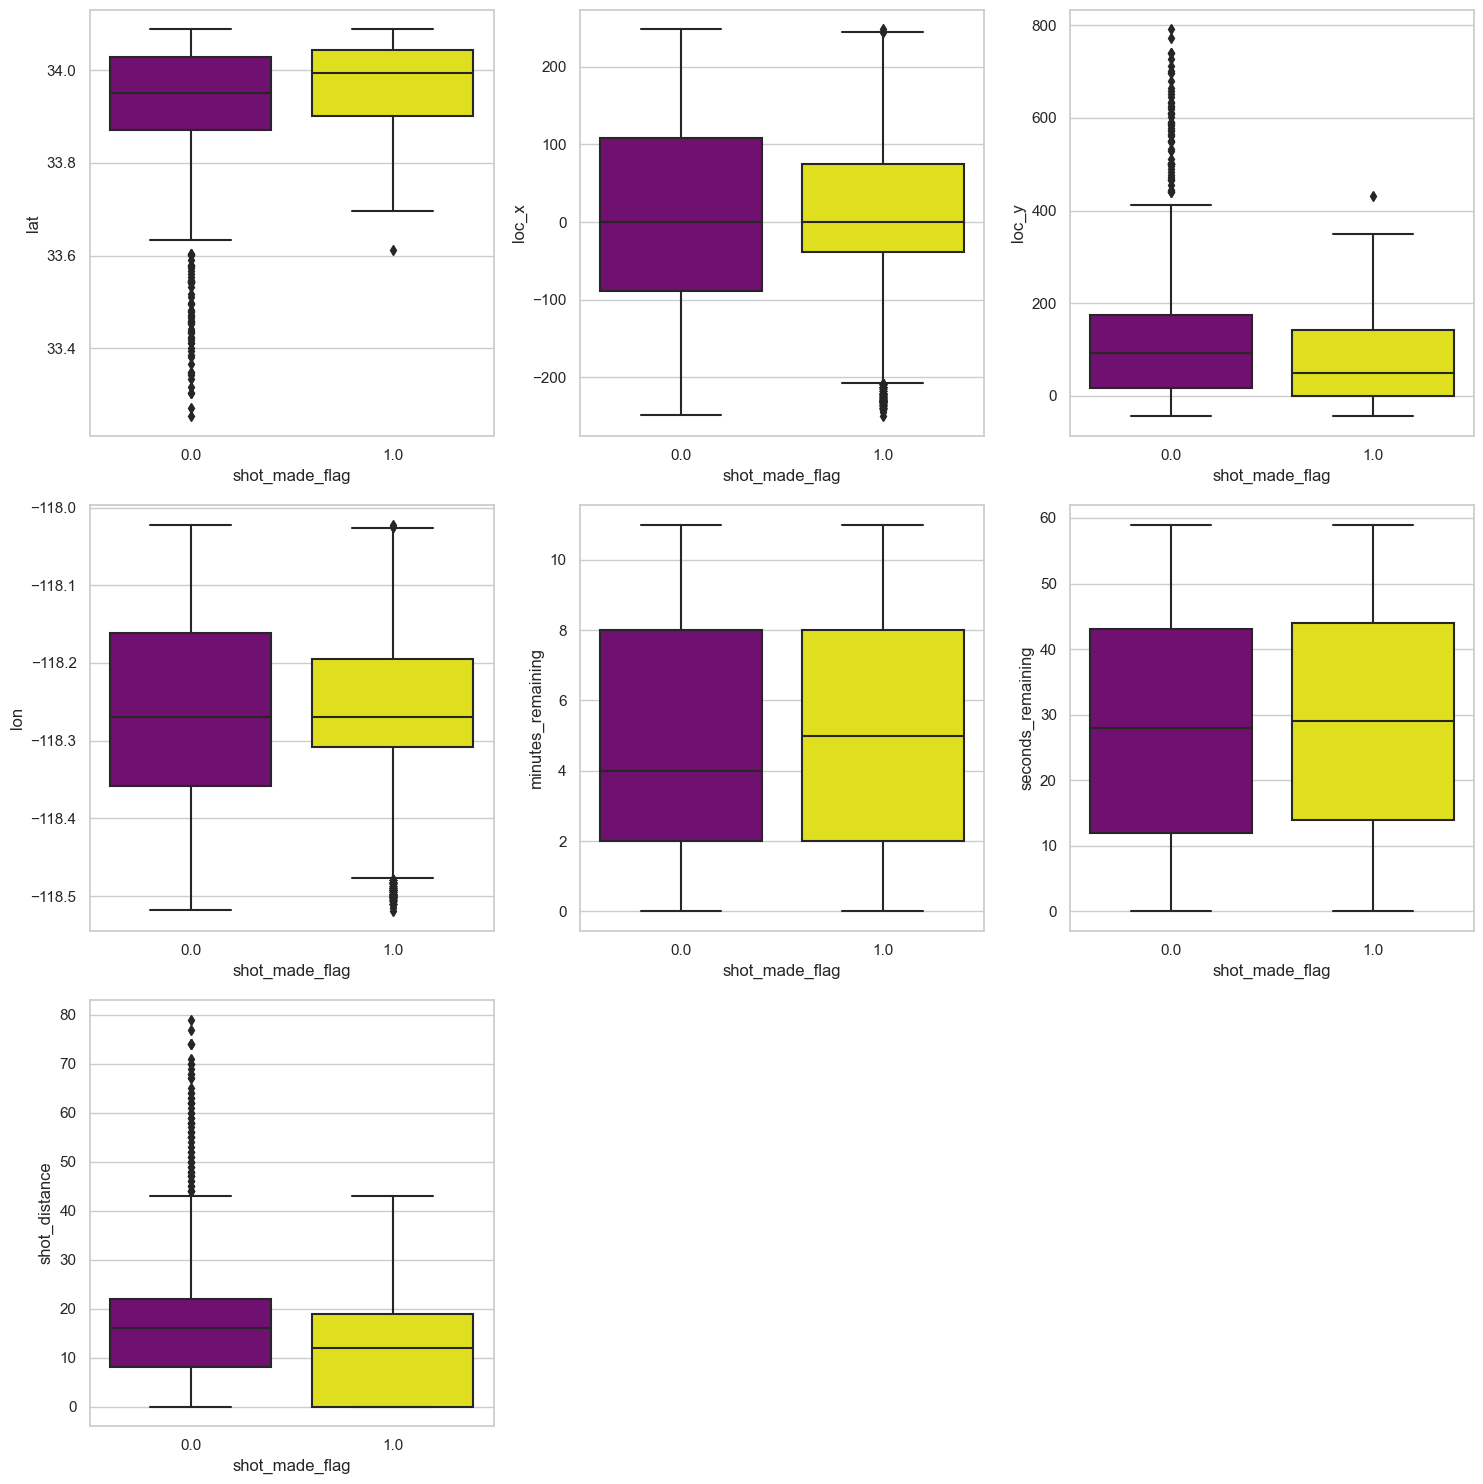

In [7]:
viz.num_plotter()

### Distribution of Numerical Features.

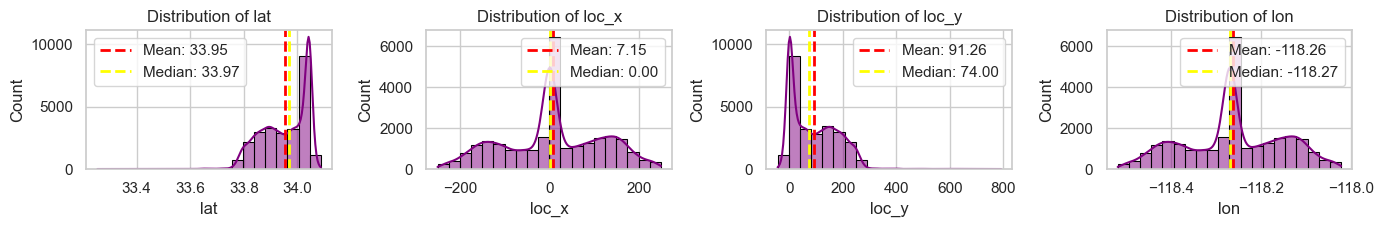

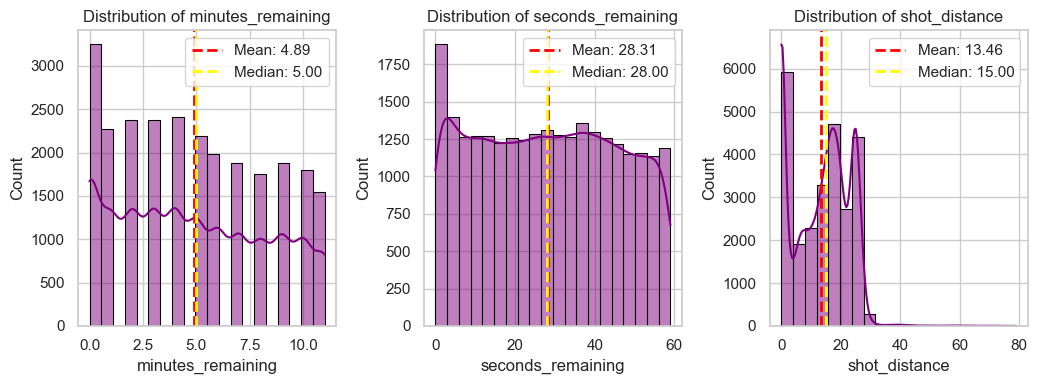

In [8]:
viz.distribution_visualizer()

### Count unique values


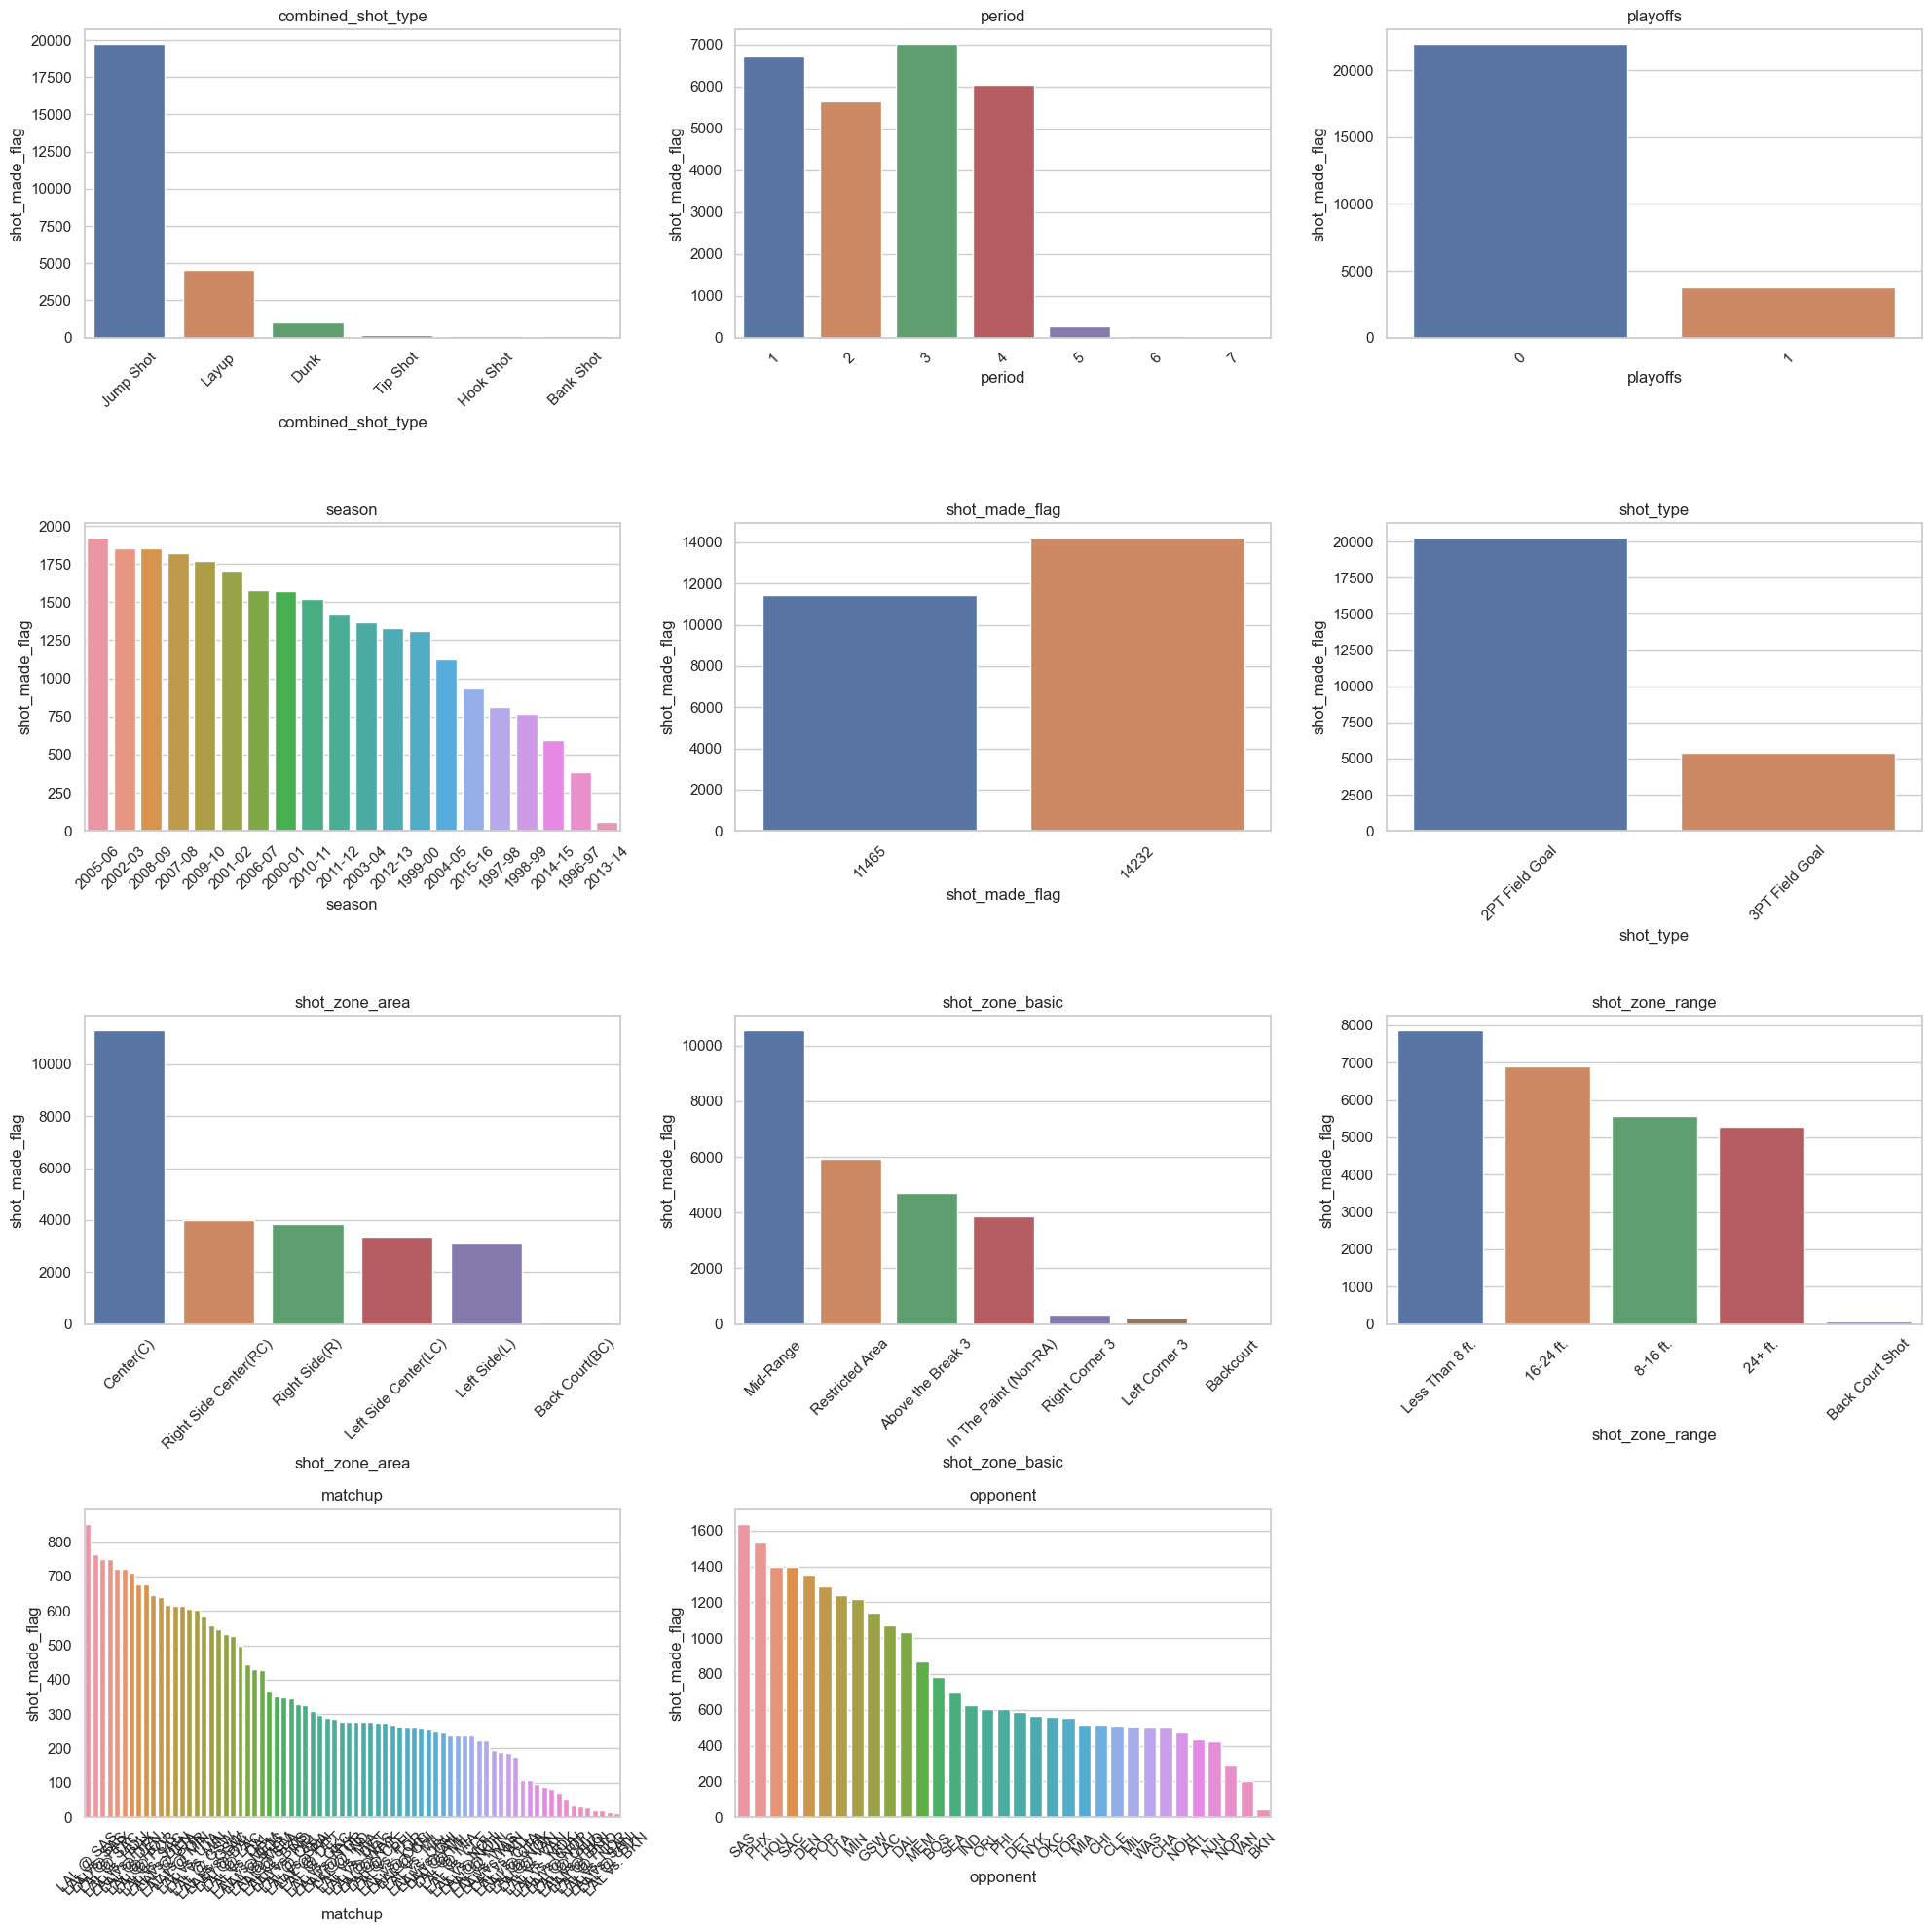

In [9]:
viz.cat_plotter()

### Shot percentage


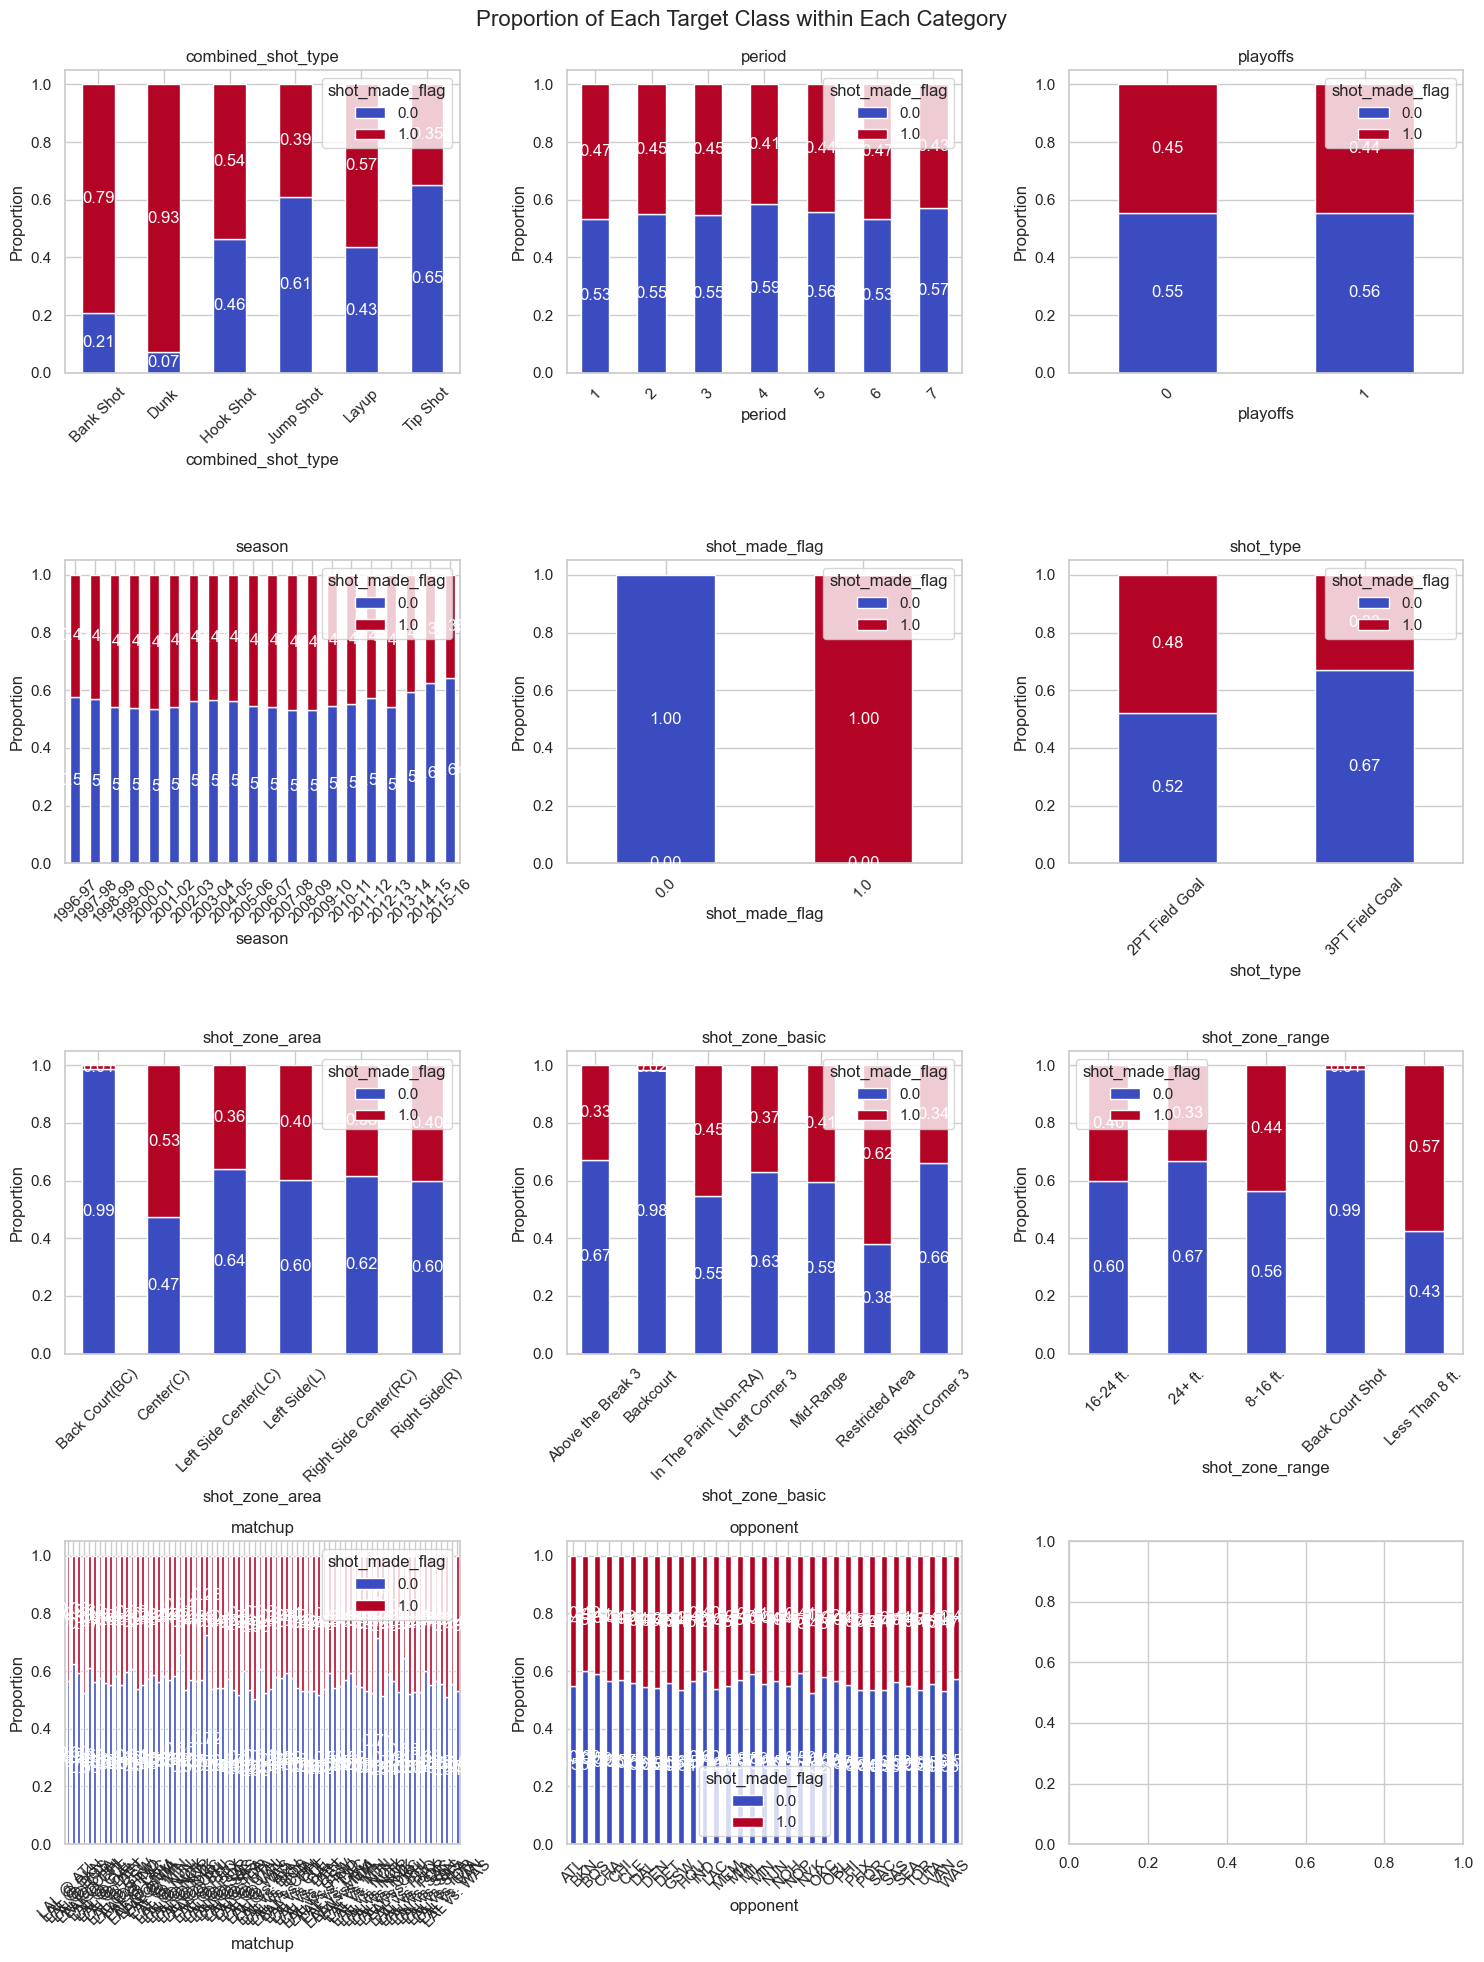

In [10]:
viz.shot_percentage()

# Step 3: Feature Engineering.
In this step we will try to modify or create new features that we think will be helpfull for improving model performance.

In [11]:
# Let's create an instance of the class
process = FeatureEngineering(train_df)

As we said, in this step we modify our data to make more powerfull predictors.
The feature engineering has the following methods:
- calculate_time: Calculates time from the start of a period and the start of the game.
- days_from_previous_game: Calculates how many days had passed from the previous game.
- period_match: Create 3 new features. 1) First or Second Half-time, 2) The period and if the match had gone to Over-Time, 3) Checks for the Court Advantage.
- group_conference: Group the opponent based on the 2 NBA Conference West or East.
- group_division: Group based on the opponent Division.
- group_season: Groups the seasons.
- data_process: Calss all the previous methods in one method.

In [12]:
# Let's apply all the transformation in one.
final_df = process.data_process()
final_df.head()

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,...,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,days_passed,Half_time,Court_Advantage,conference,division,group_seasons,number
0,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,...,622,98,98,0,First_half,No,Western_Conference,NorthWest,2000-04,63.496122
1,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,...,465,255,255,0,First_half,No,Western_Conference,NorthWest,2000-04,63.355118
2,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,...,412,308,308,0,First_half,No,Western_Conference,NorthWest,2000-04,63.253785
3,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,...,379,341,1061,0,Second_half,No,Western_Conference,NorthWest,2000-04,63.454019
4,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,...,572,148,1588,0,Second_half,No,Western_Conference,NorthWest,2000-04,63.503162


# Important NOTE
### We have create 2 DataFrames. One is the Training DataFrame and the other is the Testing DataFrame. So all the feature engineering must be applied to the Testing dataframe.

In [13]:
process = FeatureEngineering(test_df)
final_test_df = process.data_process()
final_test_df.columns

Index(['combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent', 'secondsFromPeriodEnd', 'secondsFromPeriodStart',
       'secondsFromGameStart', 'days_passed', 'Half_time', 'Court_Advantage',
       'conference', 'division', 'group_seasons', 'number'],
      dtype='object')

# Step 4: Inferential Statistics.
In this step we will apply some statistical test to determine if one feature is significant for our predictions.

In [14]:
# Create an instance of the class

stats = InferStats(final_df)

The Class has 3 method which is the following:
- chi_square: Apply Chi Square test to determine if categorical feature is significant.
- fisher_test: Apply Fisher test to determine if a categorical feature is significant.
- logistic_regression: Apply Logistic Regression to determine if a numeric feature is significant.

In [15]:
# Let's apply a Chi-Square Test

stats.chi_square('division')

Chi-Square Statistic: 14.084454026982089
P-Value: 0.015081759620258211
Degrees of Freedom: 5


In [16]:
# Let's Apply a Fisher test.
stats.fisher_test('period')

Odds Ratio: 0.9928677865123606
P-Value: 0.8451460148044215


In [17]:
# Let's apply Logistic Regression
features = [#'loc_x', 
              #'loc_y',
              'lat','lon',
              #'secondsFromPeriodStart',
              'days_passed',
              'secondsFromGameStart',
             'shot_distance', #'minutes_remaining',
              'seconds_remaining',
            #'number'
             ]
stats.logistic_regression(features= features)# Let's app

Optimization terminated successfully.
         Current function value: 0.666408
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         shot_made_flag   No. Observations:                25697
Model:                          Logit   Df Residuals:                    25690
Method:                           MLE   Df Model:                            6
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                 0.03045
Time:                        14:24:23   Log-Likelihood:                -17125.
converged:                       True   LL-Null:                       -17663.
Covariance Type:            nonrobust   LLR p-value:                3.734e-229
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   43.2157     17.065      2.532      0.011       9.769      76.663

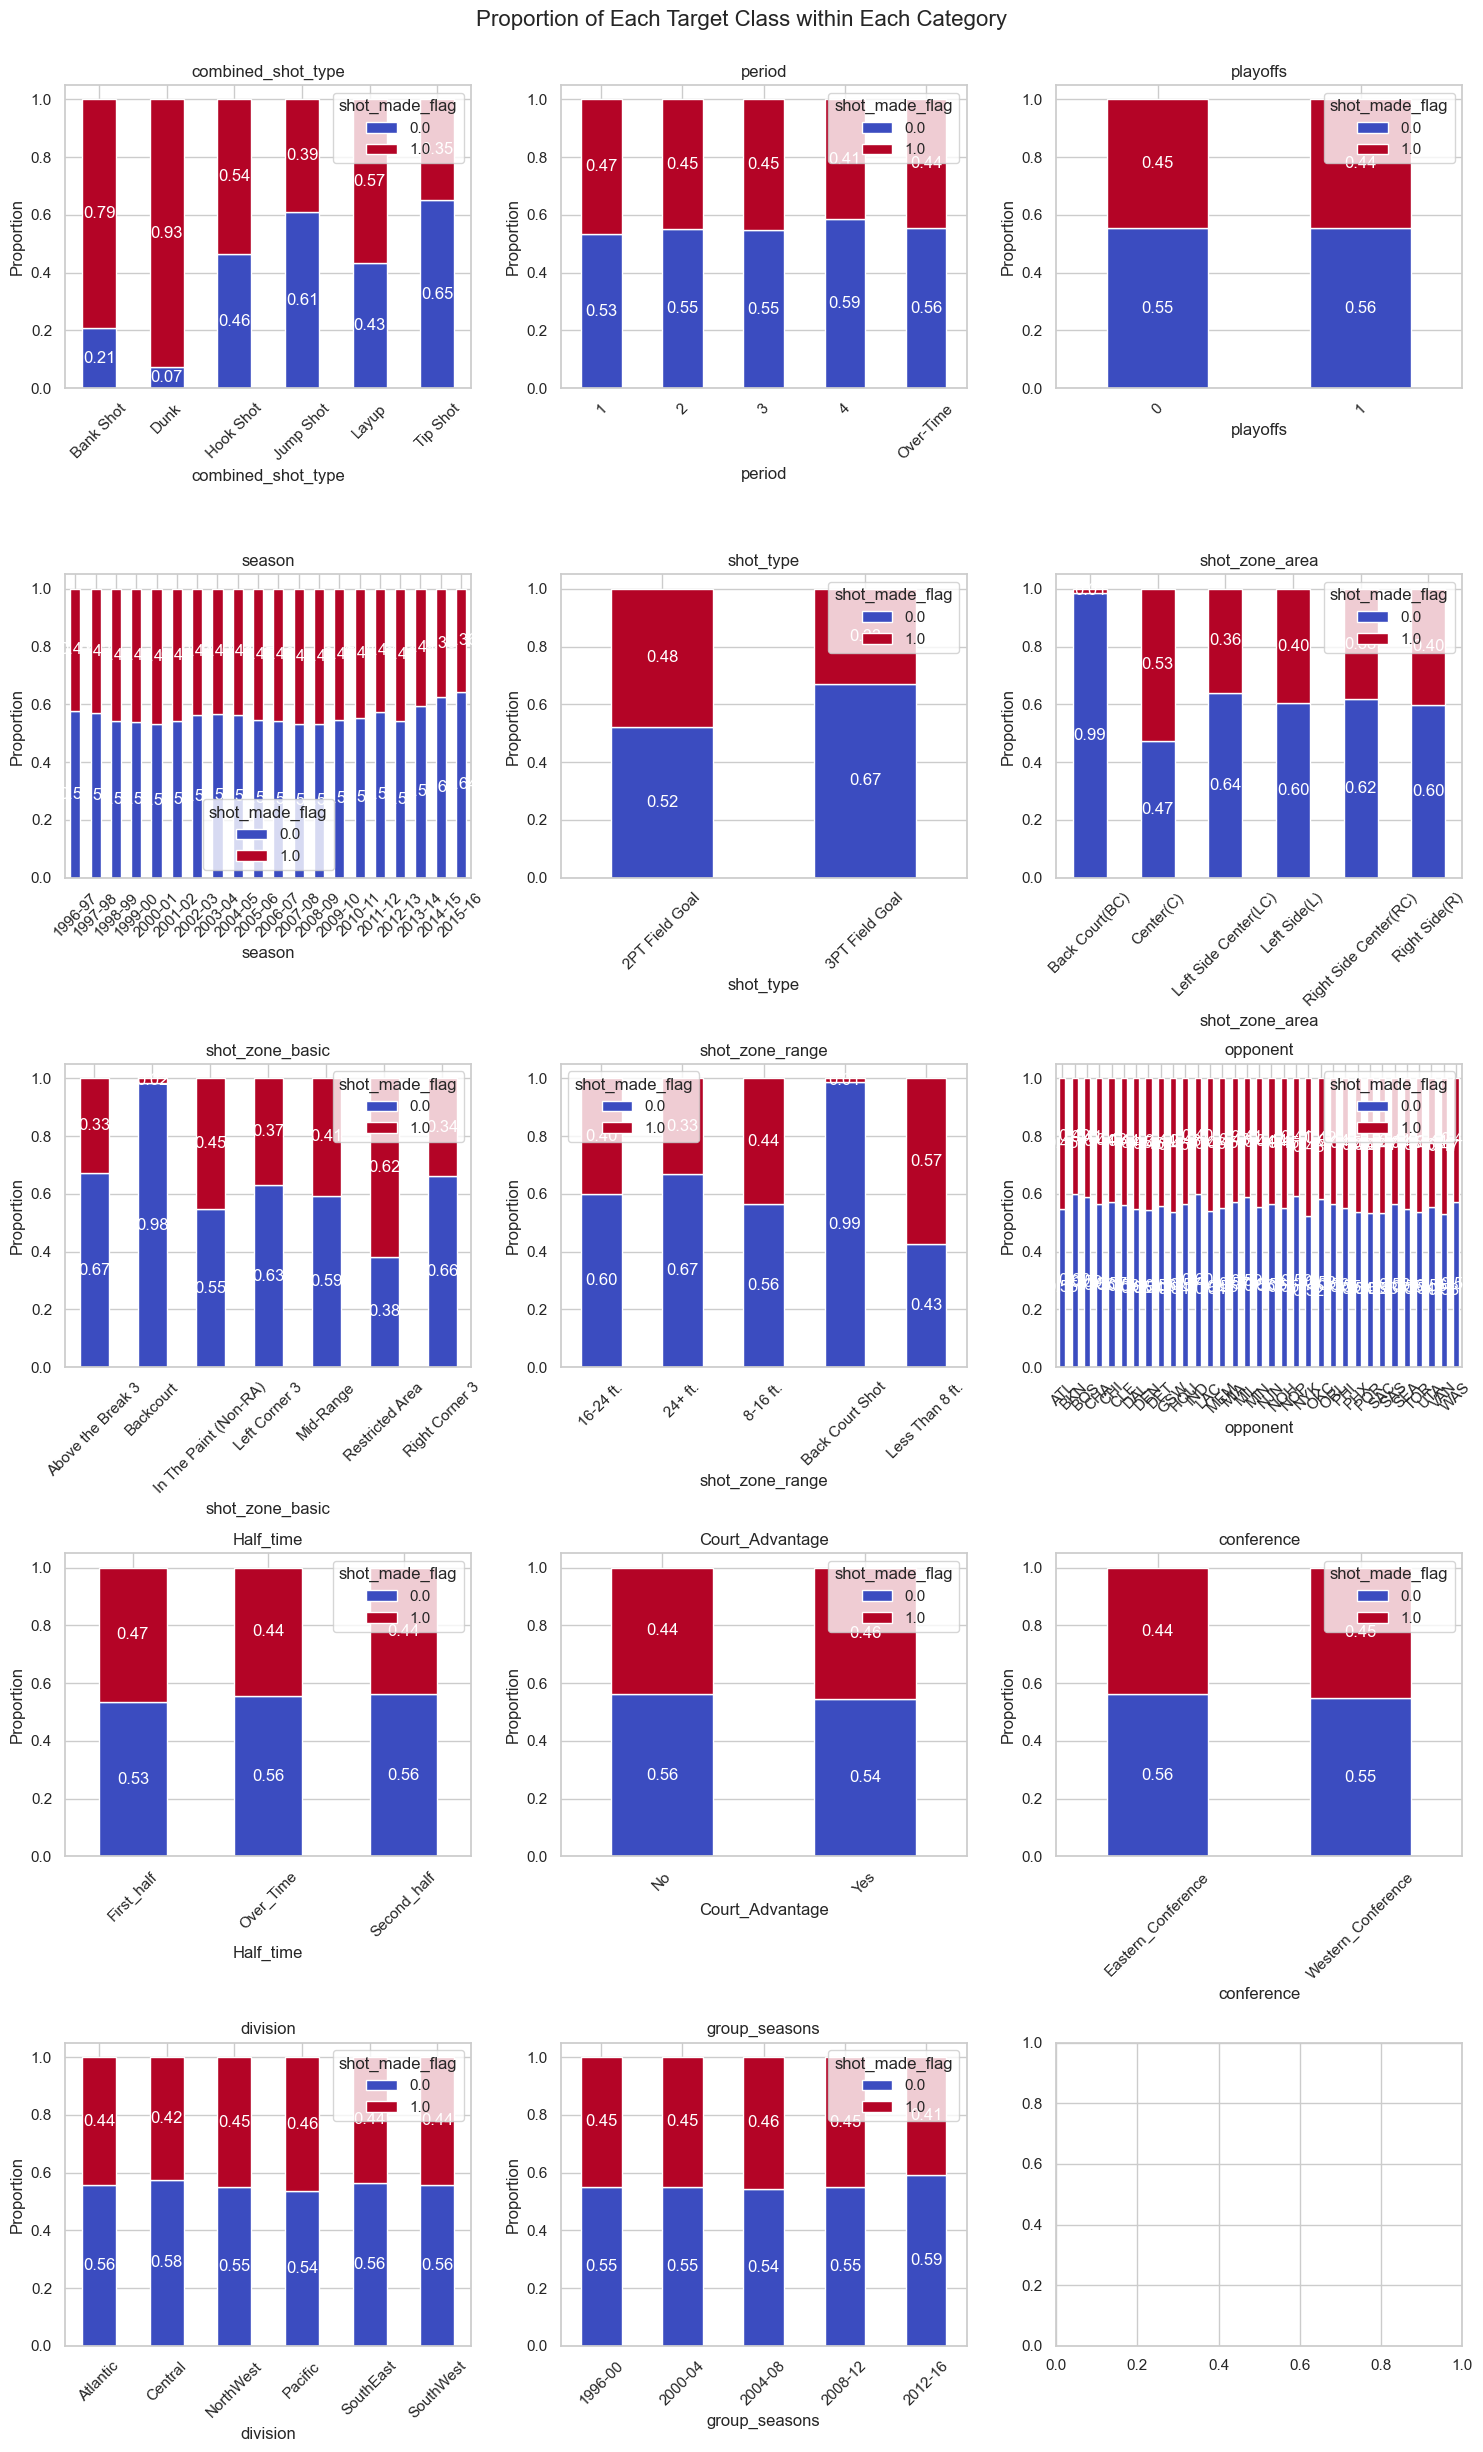

In [18]:
viz = FeatureVisualization(final_df)
viz.shot_percentage()

# Step 5: Data Preparation

In [19]:
# Create an instance of the Data preparation.
preparation = DataPreparation(final_df)



In [20]:
# List of columns that is not usefull predictors.
columns_to_drop = [
        'shot_made_flag', 'game_date', 'conference', 'opponent', 'playoffs',
        'secondsFromPeriodStart', 'secondsFromPeriodEnd', 'minutes_remaining',
        'shot_distance', 'season', 'loc_x', 'loc_y', 'days_passed',
        'period', 'shot_type', 'shot_zone_area'
    ]

# Ensure all categorical columns are strings
categorical_features = ['combined_shot_type', 
                        #'period',
                        'shot_zone_basic', 'shot_zone_range', 
                'division','Court_Advantage','group_seasons','Half_time',#'Jump_Shot'
               #shot_type', 'shot_zone_area'
                #'season',
                ]

# Split into Dependent and Independent variable and create dummies.    
X_dummies, y = preparation.data_preparation(categories=columns_to_drop, 
                                                    categorical_features=categorical_features,)


You can use the split data method to create training, testing and validation sets.


In [21]:
# Split the dataset inton training and testing sets.
X_tr, X_test, y_tr, y_test = preparation.split_data(X_dummies=X_dummies, y = y,
                                                              size= 0.8)

# From training set, split into two subsets for training and validation
X_train, X_valid, y_train, y_valid = preparation.split_data(X_dummies= X_tr, y = y_tr, size = 0.75)
X_train

,lat,lon,seconds_remaining,secondsFromGameStart,number,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot,...,division_Pacific,division_SouthEast,division_SouthWest,Court_Advantage_Yes,group_seasons_2000-04,group_seasons_2004-08,group_seasons_2008-12,group_seasons_2012-16,Half_time_Over_Time,Half_time_Second_half
14588,33.9093,-118.4788,41.0,2779.0,63.384014,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,1
2305,33.9033,-118.1468,2.0,358.0,63.289544,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
2454,34.0183,-118.4718,51.0,489.0,63.483929,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
24785,33.8853,-118.4078,50.0,1090.0,63.342591,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2371,33.8673,-118.3408,25.0,1895.0,63.307846,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11600,33.8493,-118.1808,19.0,1961.0,63.248220,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
17496,34.0353,-118.1508,0.0,300.0,63.413705,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13836,34.0303,-118.2938,24.0,1416.0,63.447407,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
673,34.0313,-118.1258,35.0,2245.0,63.403269,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


# Step 5: Logistic Regression - Regularization

In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)

model.coef_

array([[ 7.02101687e-02,  4.92702268e-02,  2.76994562e-03,
        -7.80410235e-05,  5.24384324e-02,  5.33272216e-01,
         2.13737775e-03, -4.04520814e-01, -1.30008826e-01,
        -4.46403261e-02, -3.69968974e-02,  9.25831425e-02,
        -1.59232630e-02,  7.73498676e-02,  3.31050118e-01,
        -1.69601411e-02, -4.59020920e-01,  2.56079124e-01,
        -4.24089243e-02,  2.30420161e-01, -8.00176003e-02,
         1.82287490e-02,  8.08156330e-02, -2.64027565e-02,
        -3.03818686e-02,  1.13953764e-01, -2.41918746e-03,
         1.28300039e-01,  5.12752636e-02, -7.30756150e-02,
         9.42847520e-03,  1.01138579e-02]])

In [23]:
# Create an instance of the Model Evaluation
valid = ModelEvaluation(model= model)

In [24]:
# Return some metrics for the model
#valid.validation(X_valid, y_valid)

valid.validation(X_test, y_test)

------- Calculate Metrics for  set.--------

Validation Accuracy: 0.6033073929961089
The precision score for  set is: 0.5738950276243094
The recall score for  set is: 0.36884154460719043
The F1 score for  set is: 0.44906781950824104
Log Loss : 0.6631



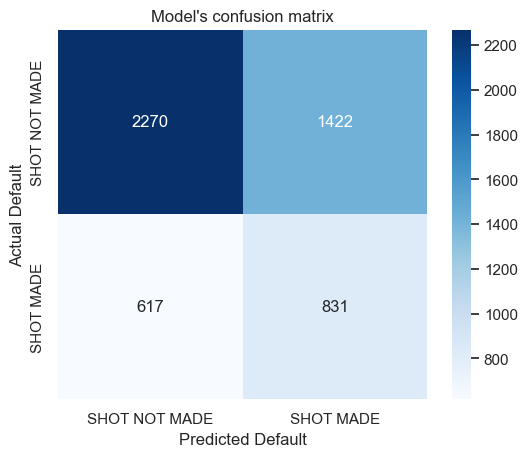

In [25]:
valid.model_confusion_matrix(X_test, y_test)

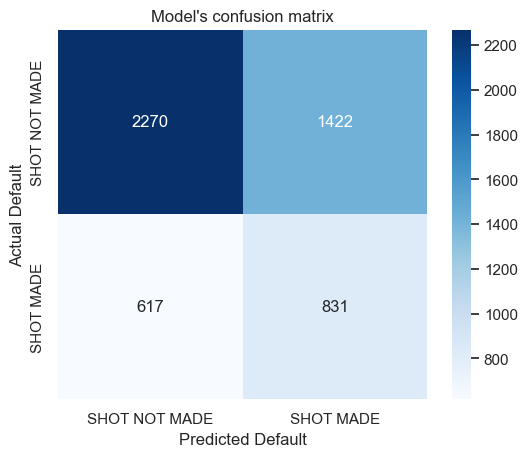

In [26]:
valid.model_confusion_matrix(X_test, y_test)

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [28]:
# We use Regularize Logistic Regression.
# We find the best hyperparameters by using the gridsearch.
logreg = LogisticRegression(solver = 'saga', C = 0.1, penalty = 'l1') 

logreg.fit(X_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [29]:
X_test_scaled = scaler.transform(X_test)

logreg.score(X_test_scaled,y_test)

y_pred_log = logreg.predict(X_test_scaled)

------- Calculate Metrics for  set.--------

Validation Accuracy: 0.6180933852140078
The precision score for  set is: 0.6173139158576052
The recall score for  set is: 0.3386595650244119
The F1 score for  set is: 0.4373746059042706
Log Loss : 0.6520



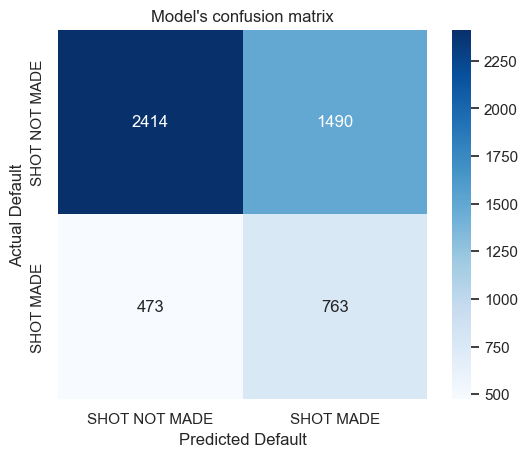

In [30]:
valid = ModelEvaluation(model= logreg)
valid.model_confusion_matrix(X_test_scaled,y_test)
valid.validation(X_test_scaled,y_test)

# Step 6: Artificial Neural Network.

In [31]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

# Define the model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(X_train_std.shape[1],)))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
'''ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))'''
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = ann.fit(X_train_std, y_train, 
                  batch_size=64, 
                  epochs=100, 
                  validation_data=(X_valid_std, y_valid), 
                  callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5607 - loss: 0.6818 - val_accuracy: 0.6088 - val_loss: 0.6599
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5973 - loss: 0.6595 - val_accuracy: 0.6091 - val_loss: 0.6575
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6032 - loss: 0.6563 - val_accuracy: 0.6074 - val_loss: 0.6584
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6048 - loss: 0.6528 - val_accuracy: 0.6053 - val_loss: 0.6589
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6048 - loss: 0.6532 - val_accuracy: 0.6076 - val_loss: 0.6589
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6118 - loss: 0.6463 - val_accuracy: 0.6058 - val_loss: 0.6592
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6108 - loss: 0.6500 - val_accuracy: 0.6056 - val_loss: 0.6601
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6131 - loss: 0.6476 - val_accu

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Log Loss: 0.6521075977075497
Accuracy: 0.6180933852140078


[Text(0.5, 20.049999999999997, 'Predicted Default'),
 Text(74.45000000000006, 0.5, 'Actual Default'),
 Text(0.5, 1.0, 'Artificial Neural Network confusion matrix')]

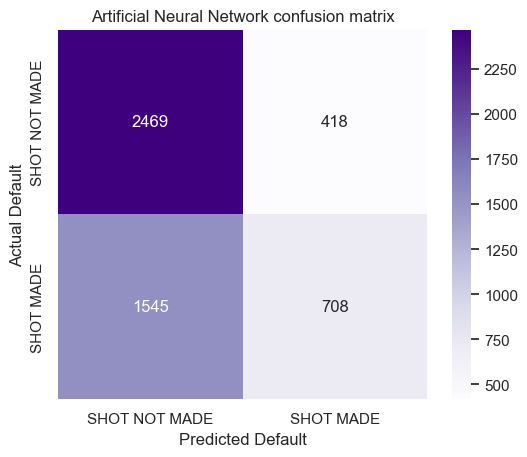

In [32]:
from sklearn.metrics import log_loss,accuracy_score, confusion_matrix
from keras.models import load_model
ann1 = load_model('model.h5')

# Predict probabilities on the validation set
y_pred_prob = ann.predict(X_test_std)

# Calculate log loss
loss = log_loss(y_test, y_pred_prob)
print("Log Loss:", loss)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize the results by using a heeatmap. 
sns.heatmap(
    conf_matrix, 
    cmap="Purples",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["SHOT NOT MADE", "SHOT MADE"],        
    yticklabels=["SHOT NOT MADE", "SHOT MADE"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Artificial Neural Network confusion matrix')

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


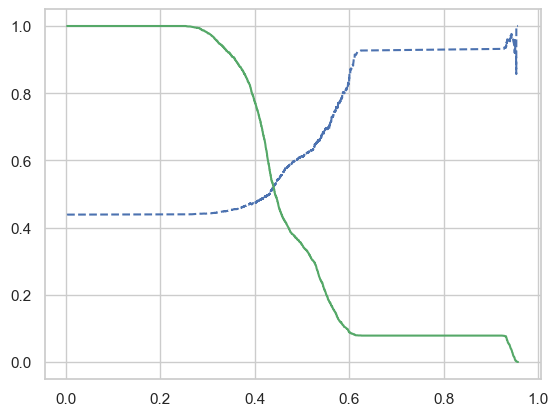

In [33]:
from sklearn.metrics import precision_recall_curve

y_pred_prob = ann1.predict(X_test_std)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
     

plot_precision_recall_vs_threshold(precision, recall, thresholds)    
plt.show()


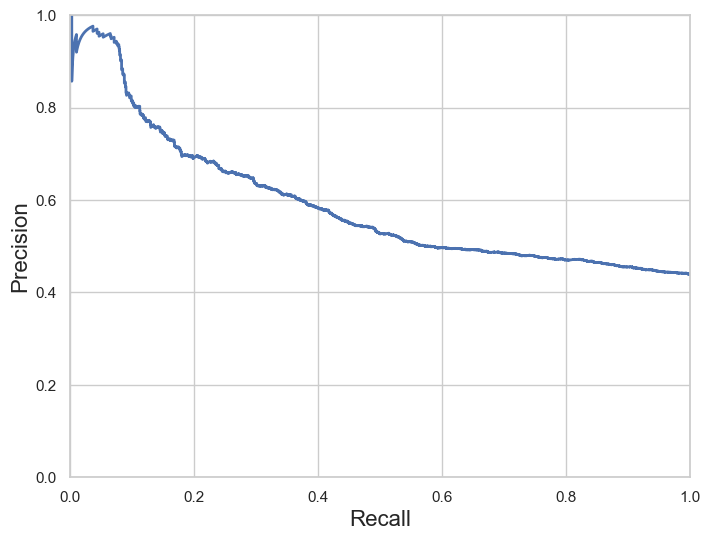

In [34]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.9)]


y_train_pred_90 = (y_pred_prob >= threshold_90_precision)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision, recall)

plt.show()

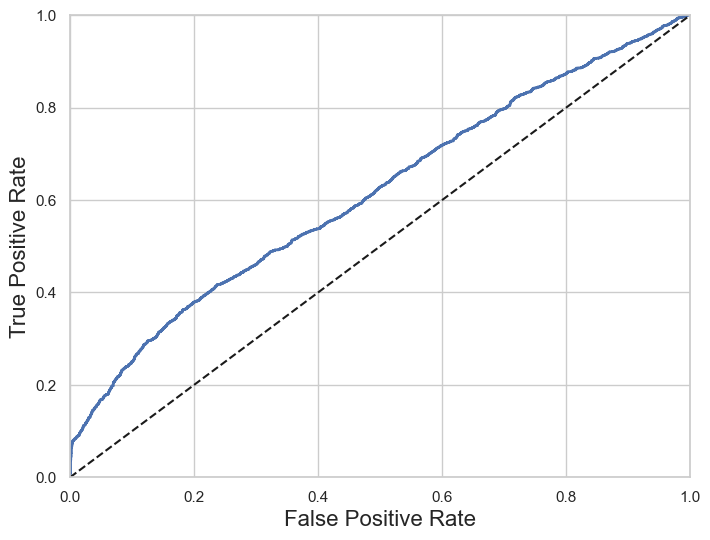

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.6135560160635605

# Step 8: Save the model

In [37]:
#ann.save('model.h5')


# Step 9: Compare ANN and Logistic Regression

In [38]:
# Let's start by comparing the accuracy of the model


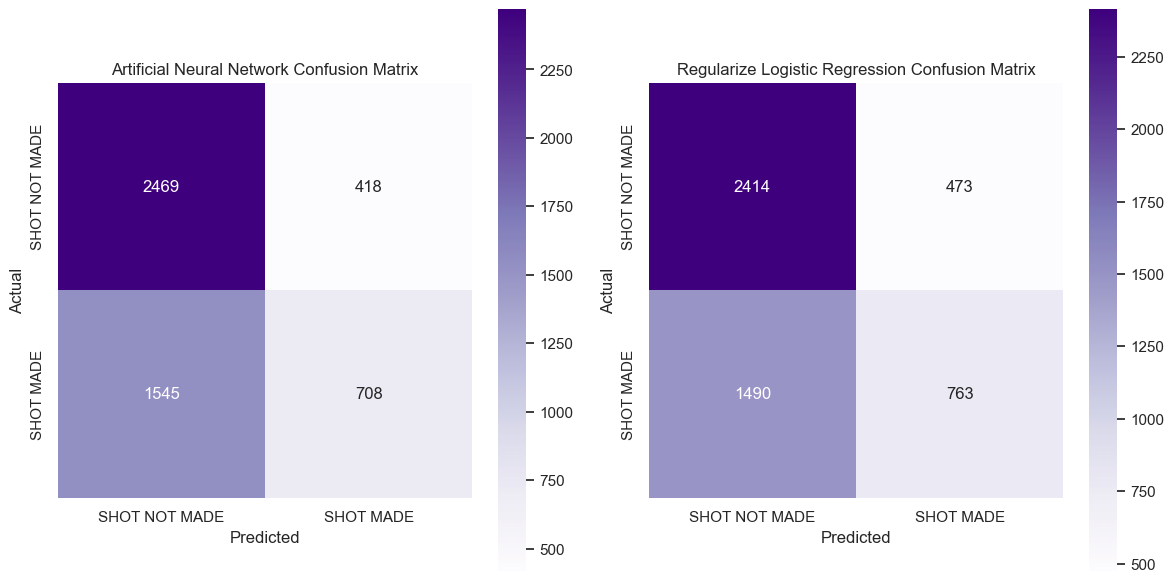

In [48]:
# Assuming y_test and y_pred for the first model
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Assuming y_test2 and y_pred2 for the second model
conf_matrix2 = confusion_matrix(y_test, y_pred_log)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first confusion matrix
sns.heatmap(
    conf_matrix1, 
    cmap="Purples",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["SHOT NOT MADE", "SHOT MADE"],        
    yticklabels=["SHOT NOT MADE", "SHOT MADE"],
    ax=axes[0]
).set(
    xlabel='Predicted',
    ylabel='Actual',
    title='Artificial Neural Network Confusion Matrix'
)

# Plot the second confusion matrix
sns.heatmap(
    conf_matrix2, 
    cmap="Purples",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["SHOT NOT MADE", "SHOT MADE"],        
    yticklabels=["SHOT NOT MADE", "SHOT MADE"],
    ax=axes[1]
).set(
    xlabel='Predicted',
    ylabel='Actual',
    title='Regularize Logistic Regression Confusion Matrix'
)

# Adjust layout
plt.tight_layout()

plt.savefig('confusion_matrices2.png', dpi=300)

plt.show()

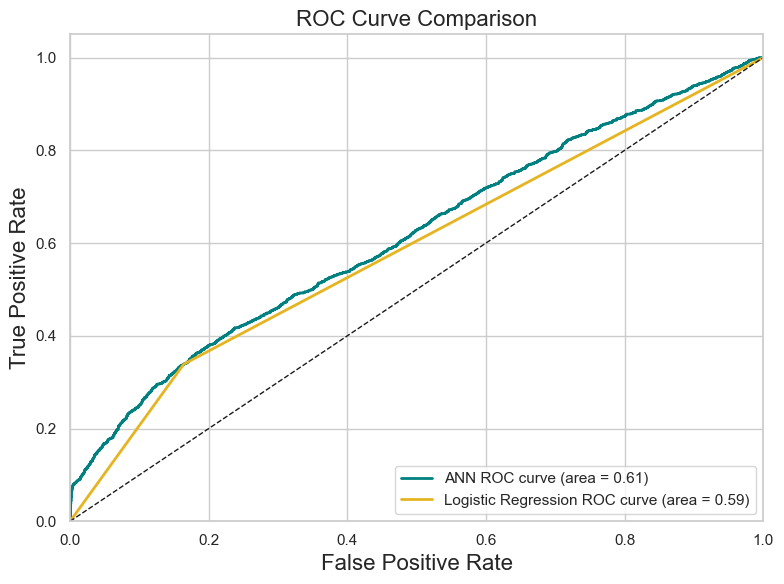

In [58]:
from sklearn.metrics import roc_curve, auc
# Assuming y_test and y_pred_prob for the first model
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob)
roc_auc1 = auc(fpr1, tpr1)

# Assuming y_test and y_pred_log for the second model
fpr2, tpr2, _ = roc_curve(y_test, y_pred_log)
roc_auc2 = auc(fpr2, tpr2)

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve for the first model (ANN)
ax.plot(fpr1, tpr1, color=(0/255, 128/255, 128/255), lw=2, label=f'ANN ROC curve (area = {roc_auc1:.2f})')
# Plot the ROC curve for the second model (Logistic Regression)
ax.plot(fpr2, tpr2, color=(230/255, 180/255, 32/255), lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc2:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='k', lw=1, linestyle='--')

# Set plot limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Set labels and title
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_title('ROC Curve Comparison', fontsize=16)

# Add legend
ax.legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('roc_curves_comparison.png', dpi=300)

# Show the plot
plt.show()

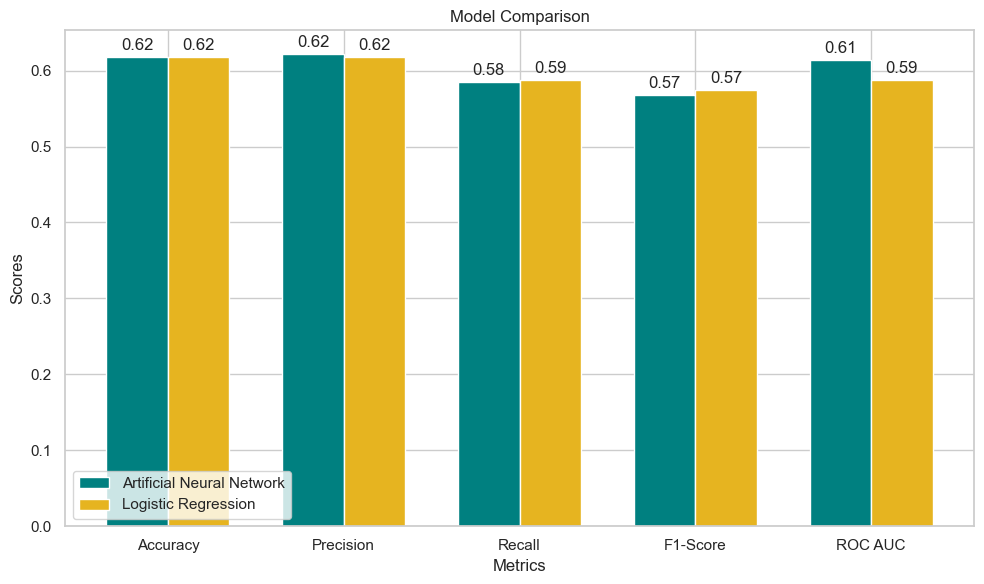

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
ann_scores = [accuracy_score(y_test, y_pred), 
             precision_score(y_test, y_pred, average='macro'), 
             recall_score(y_test, y_pred, average='macro'), 
             f1_score(y_test, y_pred, average='macro'), 
             roc_auc1]
logreg_scores = [accuracy_score(y_test, y_pred_log), 
              precision_score(y_test, y_pred_log, average='macro'), 
              recall_score(y_test, y_pred_log, average='macro'), 
              f1_score(y_test, y_pred_log, average='macro'), 
              roc_auc2]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ann_scores, width, label='Artificial Neural Network',color = (0/255, 128/255, 128/255))
rects2 = ax.bar(x + width/2, logreg_scores, width, label='Logistic Regression',color = (230/255, 180/255, 32/255))

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc = 'lower left')

# Attach a text label above each bar in rects
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('metrics_comparison.png', dpi=300)

plt.show()
